##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](images/beginner/run_cell_icon.png)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
import matplotlib.pyplot as plt

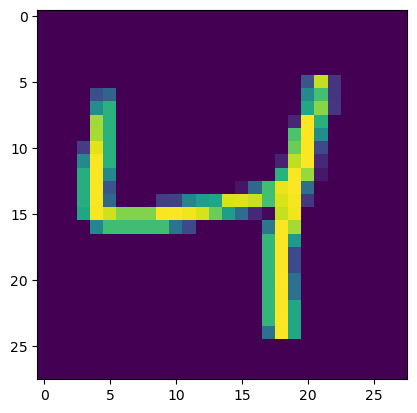

In [18]:
plt.imshow(x_train[2])

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

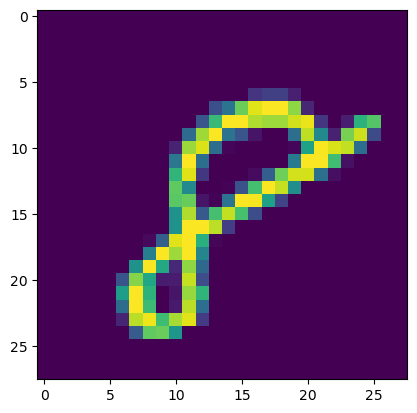

In [26]:
plt.imshow(x_train[-1])

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [30]:
model(x_train[:1]).numpy()

array([[-0.02135128, -0.13329065, -1.4558482 , -0.23095264, -0.05071081,
         0.21604404, -0.9383102 ,  0.37436798,  0.66434544, -0.43087313]],
      dtype=float32)

In [31]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.02135128, -0.13329065, -1.4558482 , -0.23095264, -0.05071081,
         0.21604404, -0.9383102 ,  0.37436798,  0.66434544, -0.43087313]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [32]:
tf.nn.softmax(predictions).numpy()

array([[0.1029171 , 0.09201802, 0.02451847, 0.08345624, 0.09993943,
        0.13049296, 0.04113934, 0.15287845, 0.20430635, 0.06833364]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [33]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [34]:
loss_fn(y_train[:1], predictions).numpy()

2.036436

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [35]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [36]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2965 - accuracy: 0.9130
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1421 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1068 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0889 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0740 - accuracy: 0.9766


 111/1875 [>.............................] - ETA: 4s - loss: 0.9275 - accuracy: 0.7300

 135/1875 [=>............................] - ETA: 3s - loss: 0.8487 - accuracy: 0.7507

 159/1875 [=>............................] - ETA: 3s - loss: 0.7922 - accuracy: 0.7673

 183/1875 [=>............................] - ETA: 3s - loss: 0.7481 - accuracy: 0.7804

 207/1875 [==>...........................] - ETA: 3s - loss: 0.7057 - accuracy: 0.7921

 232/1875 [==>...........................] - ETA: 3s - loss: 0.6789 - accuracy: 0.7993

 256/1875 [===>..........................] - ETA: 3s - loss: 0.6523 - accuracy: 0.8070

 280/1875 [===>..........................] - ETA: 3s - loss: 0.6290 - accuracy: 0.8143

 304/1875 [===>..........................] - ETA: 3s - loss: 0.6080 - accuracy: 0.8215

 328/1875 [====>.........................] - ETA: 3s - loss: 0.5918 - accuracy: 0.8273

 352/1875 [====>.........................] - ETA: 3s - loss: 0.5761 - accuracy: 0.8322

 377/1875 [=====>........................] - ETA: 3s - loss: 0.5660 - accuracy: 0.8358

 401/1875 [=====>........................] - ETA: 3s - loss: 0.5496 - accuracy: 0.8404

 425/1875 [=====>........................] - ETA: 3s - loss: 0.5357 - accuracy: 0.8446

 450/1875 [======>.......................] - ETA: 3s - loss: 0.5249 - accuracy: 0.8481

 474/1875 [======>.......................] - ETA: 3s - loss: 0.5165 - accuracy: 0.8504

 498/1875 [======>.......................] - ETA: 2s - loss: 0.5069 - accuracy: 0.8533

 522/1875 [=======>......................] - ETA: 2s - loss: 0.4956 - accuracy: 0.8566

 546/1875 [=======>......................] - ETA: 2s - loss: 0.4845 - accuracy: 0.8598

 571/1875 [========>.....................] - ETA: 2s - loss: 0.4756 - accuracy: 0.8620

 596/1875 [========>.....................] - ETA: 2s - loss: 0.4665 - accuracy: 0.8645

 620/1875 [========>.....................] - ETA: 2s - loss: 0.4587 - accuracy: 0.8670

 643/1875 [=========>....................] - ETA: 2s - loss: 0.4527 - accuracy: 0.8686

 667/1875 [=========>....................] - ETA: 2s - loss: 0.4467 - accuracy: 0.8705

 691/1875 [==========>...................] - ETA: 2s - loss: 0.4409 - accuracy: 0.8721

 714/1875 [==========>...................] - ETA: 2s - loss: 0.4344 - accuracy: 0.8742

 737/1875 [==========>...................] - ETA: 2s - loss: 0.4284 - accuracy: 0.8760

 760/1875 [===========>..................] - ETA: 2s - loss: 0.4220 - accuracy: 0.8778

 784/1875 [===========>..................] - ETA: 2s - loss: 0.4161 - accuracy: 0.8797

 807/1875 [===========>..................] - ETA: 2s - loss: 0.4103 - accuracy: 0.8813

 831/1875 [============>.................] - ETA: 2s - loss: 0.4054 - accuracy: 0.8825

 855/1875 [============>.................] - ETA: 2s - loss: 0.4017 - accuracy: 0.8836

 878/1875 [=============>................] - ETA: 2s - loss: 0.3967 - accuracy: 0.8850

 902/1875 [=============>................] - ETA: 2s - loss: 0.3918 - accuracy: 0.8863

 925/1875 [=============>................] - ETA: 2s - loss: 0.3877 - accuracy: 0.8875

 949/1875 [==============>...............] - ETA: 1s - loss: 0.3849 - accuracy: 0.8884

 973/1875 [==============>...............] - ETA: 1s - loss: 0.3814 - accuracy: 0.8897

 997/1875 [==============>...............] - ETA: 1s - loss: 0.3781 - accuracy: 0.8907

1021/1875 [===============>..............] - ETA: 1s - loss: 0.3743 - accuracy: 0.8917

1046/1875 [===============>..............] - ETA: 1s - loss: 0.3707 - accuracy: 0.8926

1070/1875 [================>.............] - ETA: 1s - loss: 0.3675 - accuracy: 0.8936

1095/1875 [================>.............] - ETA: 1s - loss: 0.3650 - accuracy: 0.8945

1120/1875 [================>.............] - ETA: 1s - loss: 0.3626 - accuracy: 0.8953

1145/1875 [=================>............] - ETA: 1s - loss: 0.3596 - accuracy: 0.8960

1170/1875 [=================>............] - ETA: 1s - loss: 0.3558 - accuracy: 0.8971

1195/1875 [==================>...........] - ETA: 1s - loss: 0.3520 - accuracy: 0.8982

1220/1875 [==================>...........] - ETA: 1s - loss: 0.3492 - accuracy: 0.8990

1245/1875 [==================>...........] - ETA: 1s - loss: 0.3456 - accuracy: 0.8999

1269/1875 [===================>..........] - ETA: 1s - loss: 0.3427 - accuracy: 0.9008

1294/1875 [===================>..........] - ETA: 1s - loss: 0.3405 - accuracy: 0.9016

1319/1875 [====================>.........] - ETA: 1s - loss: 0.3386 - accuracy: 0.9021

1344/1875 [====================>.........] - ETA: 1s - loss: 0.3368 - accuracy: 0.9026

1368/1875 [====================>.........] - ETA: 1s - loss: 0.3345 - accuracy: 0.9033

1391/1875 [=====================>........] - ETA: 1s - loss: 0.3326 - accuracy: 0.9038

1415/1875 [=====================>........] - ETA: 0s - loss: 0.3298 - accuracy: 0.9046

1439/1875 [======================>.......] - ETA: 0s - loss: 0.3272 - accuracy: 0.9054

1464/1875 [======================>.......] - ETA: 0s - loss: 0.3249 - accuracy: 0.9060

1489/1875 [======================>.......] - ETA: 0s - loss: 0.3221 - accuracy: 0.9068

1514/1875 [=======================>......] - ETA: 0s - loss: 0.3197 - accuracy: 0.9075

1539/1875 [=======================>......] - ETA: 0s - loss: 0.3179 - accuracy: 0.9080

1563/1875 [========================>.....] - ETA: 0s - loss: 0.3156 - accuracy: 0.9086

1587/1875 [========================>.....] - ETA: 0s - loss: 0.3135 - accuracy: 0.9093

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3119 - accuracy: 0.9097

1635/1875 [=========================>....] - ETA: 0s - loss: 0.3105 - accuracy: 0.9101

1659/1875 [=========================>....] - ETA: 0s - loss: 0.3086 - accuracy: 0.9106

1683/1875 [=========================>....] - ETA: 0s - loss: 0.3070 - accuracy: 0.9111

1707/1875 [==========================>...] - ETA: 0s - loss: 0.3053 - accuracy: 0.9117

1731/1875 [==========================>...] - ETA: 0s - loss: 0.3037 - accuracy: 0.9121

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3019 - accuracy: 0.9124

1779/1875 [===========================>..] - ETA: 0s - loss: 0.3007 - accuracy: 0.9127

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2992 - accuracy: 0.9131

1827/1875 [============================>.] - ETA: 0s - loss: 0.2977 - accuracy: 0.9136

1851/1875 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.9139

1875/1875 [==============================] - ETA: 0s - loss: 0.2948 - accuracy: 0.9143

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.9143


Epoch 2/5


   1/1875 [..............................] - ETA: 5s - loss: 0.3330 - accuracy: 0.8750

  25/1875 [..............................] - ETA: 3s - loss: 0.1519 - accuracy: 0.9563

  50/1875 [..............................] - ETA: 3s - loss: 0.1417 - accuracy: 0.9594

  74/1875 [>.............................] - ETA: 3s - loss: 0.1438 - accuracy: 0.9590

  98/1875 [>.............................] - ETA: 3s - loss: 0.1404 - accuracy: 0.9595

 122/1875 [>.............................] - ETA: 3s - loss: 0.1506 - accuracy: 0.9557

 146/1875 [=>............................] - ETA: 3s - loss: 0.1605 - accuracy: 0.9523

 170/1875 [=>............................] - ETA: 3s - loss: 0.1567 - accuracy: 0.9520

 194/1875 [==>...........................] - ETA: 3s - loss: 0.1534 - accuracy: 0.9531

 218/1875 [==>...........................] - ETA: 3s - loss: 0.1534 - accuracy: 0.9534

 242/1875 [==>...........................] - ETA: 3s - loss: 0.1520 - accuracy: 0.9536

 266/1875 [===>..........................] - ETA: 3s - loss: 0.1528 - accuracy: 0.9535

 291/1875 [===>..........................] - ETA: 3s - loss: 0.1533 - accuracy: 0.9527

 316/1875 [====>.........................] - ETA: 3s - loss: 0.1505 - accuracy: 0.9531

 341/1875 [====>.........................] - ETA: 3s - loss: 0.1490 - accuracy: 0.9533

 366/1875 [====>.........................] - ETA: 3s - loss: 0.1476 - accuracy: 0.9536

 390/1875 [=====>........................] - ETA: 3s - loss: 0.1485 - accuracy: 0.9534

 414/1875 [=====>........................] - ETA: 3s - loss: 0.1478 - accuracy: 0.9534

 438/1875 [======>.......................] - ETA: 3s - loss: 0.1467 - accuracy: 0.9540

 463/1875 [======>.......................] - ETA: 2s - loss: 0.1461 - accuracy: 0.9544

 487/1875 [======>.......................] - ETA: 2s - loss: 0.1459 - accuracy: 0.9543

 511/1875 [=======>......................] - ETA: 2s - loss: 0.1469 - accuracy: 0.9546

 535/1875 [=======>......................] - ETA: 2s - loss: 0.1472 - accuracy: 0.9546

 559/1875 [=======>......................] - ETA: 2s - loss: 0.1469 - accuracy: 0.9548

 583/1875 [========>.....................] - ETA: 2s - loss: 0.1471 - accuracy: 0.9550

 607/1875 [========>.....................] - ETA: 2s - loss: 0.1471 - accuracy: 0.9550

 631/1875 [=========>....................] - ETA: 2s - loss: 0.1464 - accuracy: 0.9553

 655/1875 [=========>....................] - ETA: 2s - loss: 0.1479 - accuracy: 0.9550

 679/1875 [=========>....................] - ETA: 2s - loss: 0.1480 - accuracy: 0.9553

 703/1875 [==========>...................] - ETA: 2s - loss: 0.1475 - accuracy: 0.9555

 727/1875 [==========>...................] - ETA: 2s - loss: 0.1474 - accuracy: 0.9556

 752/1875 [===========>..................] - ETA: 2s - loss: 0.1471 - accuracy: 0.9555

 777/1875 [===========>..................] - ETA: 2s - loss: 0.1468 - accuracy: 0.9558

 801/1875 [===========>..................] - ETA: 2s - loss: 0.1471 - accuracy: 0.9556

 825/1875 [============>.................] - ETA: 2s - loss: 0.1463 - accuracy: 0.9560

 850/1875 [============>.................] - ETA: 2s - loss: 0.1466 - accuracy: 0.9560

 874/1875 [============>.................] - ETA: 2s - loss: 0.1462 - accuracy: 0.9561

 899/1875 [=============>................] - ETA: 2s - loss: 0.1461 - accuracy: 0.9564

 923/1875 [=============>................] - ETA: 2s - loss: 0.1457 - accuracy: 0.9567

 947/1875 [==============>...............] - ETA: 1s - loss: 0.1463 - accuracy: 0.9565

 971/1875 [==============>...............] - ETA: 1s - loss: 0.1459 - accuracy: 0.9565

 995/1875 [==============>...............] - ETA: 1s - loss: 0.1463 - accuracy: 0.9565

1020/1875 [===============>..............] - ETA: 1s - loss: 0.1458 - accuracy: 0.9566

1045/1875 [===============>..............] - ETA: 1s - loss: 0.1456 - accuracy: 0.9567

1070/1875 [================>.............] - ETA: 1s - loss: 0.1461 - accuracy: 0.9567

1094/1875 [================>.............] - ETA: 1s - loss: 0.1461 - accuracy: 0.9565

1118/1875 [================>.............] - ETA: 1s - loss: 0.1461 - accuracy: 0.9566

1142/1875 [=================>............] - ETA: 1s - loss: 0.1458 - accuracy: 0.9568

1166/1875 [=================>............] - ETA: 1s - loss: 0.1452 - accuracy: 0.9569

1190/1875 [==================>...........] - ETA: 1s - loss: 0.1447 - accuracy: 0.9571

1214/1875 [==================>...........] - ETA: 1s - loss: 0.1451 - accuracy: 0.9570

1238/1875 [==================>...........] - ETA: 1s - loss: 0.1446 - accuracy: 0.9572

1261/1875 [===================>..........] - ETA: 1s - loss: 0.1449 - accuracy: 0.9571

1283/1875 [===================>..........] - ETA: 1s - loss: 0.1451 - accuracy: 0.9570

1306/1875 [===================>..........] - ETA: 1s - loss: 0.1449 - accuracy: 0.9571

1329/1875 [====================>.........] - ETA: 1s - loss: 0.1448 - accuracy: 0.9571

1352/1875 [====================>.........] - ETA: 1s - loss: 0.1450 - accuracy: 0.9570

1375/1875 [=====================>........] - ETA: 1s - loss: 0.1446 - accuracy: 0.9571

1398/1875 [=====================>........] - ETA: 1s - loss: 0.1442 - accuracy: 0.9571

1421/1875 [=====================>........] - ETA: 0s - loss: 0.1437 - accuracy: 0.9572

1444/1875 [======================>.......] - ETA: 0s - loss: 0.1440 - accuracy: 0.9571

1467/1875 [======================>.......] - ETA: 0s - loss: 0.1439 - accuracy: 0.9570

1490/1875 [======================>.......] - ETA: 0s - loss: 0.1436 - accuracy: 0.9571

1513/1875 [=======================>......] - ETA: 0s - loss: 0.1436 - accuracy: 0.9571

1537/1875 [=======================>......] - ETA: 0s - loss: 0.1432 - accuracy: 0.9571

1560/1875 [=======================>......] - ETA: 0s - loss: 0.1426 - accuracy: 0.9573

1583/1875 [========================>.....] - ETA: 0s - loss: 0.1427 - accuracy: 0.9573

1606/1875 [========================>.....] - ETA: 0s - loss: 0.1430 - accuracy: 0.9573

1629/1875 [=========================>....] - ETA: 0s - loss: 0.1426 - accuracy: 0.9575

1652/1875 [=========================>....] - ETA: 0s - loss: 0.1424 - accuracy: 0.9575

1675/1875 [=========================>....] - ETA: 0s - loss: 0.1424 - accuracy: 0.9575

1699/1875 [==========================>...] - ETA: 0s - loss: 0.1424 - accuracy: 0.9574

1723/1875 [==========================>...] - ETA: 0s - loss: 0.1424 - accuracy: 0.9575

1747/1875 [==========================>...] - ETA: 0s - loss: 0.1418 - accuracy: 0.9576

1771/1875 [===========================>..] - ETA: 0s - loss: 0.1415 - accuracy: 0.9577

1795/1875 [===========================>..] - ETA: 0s - loss: 0.1413 - accuracy: 0.9577

1819/1875 [============================>.] - ETA: 0s - loss: 0.1410 - accuracy: 0.9579

1842/1875 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9578

1865/1875 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9578

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9578


Epoch 3/5


   1/1875 [..............................] - ETA: 5s - loss: 0.1621 - accuracy: 0.9062

  24/1875 [..............................] - ETA: 4s - loss: 0.1241 - accuracy: 0.9622

  47/1875 [..............................] - ETA: 3s - loss: 0.1117 - accuracy: 0.9641

  71/1875 [>.............................] - ETA: 3s - loss: 0.1072 - accuracy: 0.9674

  95/1875 [>.............................] - ETA: 3s - loss: 0.1072 - accuracy: 0.9678

 119/1875 [>.............................] - ETA: 3s - loss: 0.1082 - accuracy: 0.9690

 143/1875 [=>............................] - ETA: 3s - loss: 0.1068 - accuracy: 0.9692

 166/1875 [=>............................] - ETA: 3s - loss: 0.1084 - accuracy: 0.9678

 190/1875 [==>...........................] - ETA: 3s - loss: 0.1101 - accuracy: 0.9674

 213/1875 [==>...........................] - ETA: 3s - loss: 0.1096 - accuracy: 0.9671

 237/1875 [==>...........................] - ETA: 3s - loss: 0.1074 - accuracy: 0.9685

 260/1875 [===>..........................] - ETA: 3s - loss: 0.1053 - accuracy: 0.9689

 283/1875 [===>..........................] - ETA: 3s - loss: 0.1055 - accuracy: 0.9682

 307/1875 [===>..........................] - ETA: 3s - loss: 0.1049 - accuracy: 0.9689

 330/1875 [====>.........................] - ETA: 3s - loss: 0.1052 - accuracy: 0.9683

 353/1875 [====>.........................] - ETA: 3s - loss: 0.1087 - accuracy: 0.9670

 376/1875 [=====>........................] - ETA: 3s - loss: 0.1083 - accuracy: 0.9671

 399/1875 [=====>........................] - ETA: 3s - loss: 0.1087 - accuracy: 0.9671

 422/1875 [=====>........................] - ETA: 3s - loss: 0.1096 - accuracy: 0.9669

 446/1875 [======>.......................] - ETA: 3s - loss: 0.1090 - accuracy: 0.9671

 471/1875 [======>.......................] - ETA: 3s - loss: 0.1080 - accuracy: 0.9676

 495/1875 [======>.......................] - ETA: 3s - loss: 0.1073 - accuracy: 0.9679

 519/1875 [=======>......................] - ETA: 2s - loss: 0.1074 - accuracy: 0.9680

 543/1875 [=======>......................] - ETA: 2s - loss: 0.1071 - accuracy: 0.9681

 567/1875 [========>.....................] - ETA: 2s - loss: 0.1069 - accuracy: 0.9679

 591/1875 [========>.....................] - ETA: 2s - loss: 0.1068 - accuracy: 0.9681

 614/1875 [========>.....................] - ETA: 2s - loss: 0.1079 - accuracy: 0.9679

 638/1875 [=========>....................] - ETA: 2s - loss: 0.1079 - accuracy: 0.9679

 661/1875 [=========>....................] - ETA: 2s - loss: 0.1078 - accuracy: 0.9679

 685/1875 [=========>....................] - ETA: 2s - loss: 0.1087 - accuracy: 0.9677

 709/1875 [==========>...................] - ETA: 2s - loss: 0.1091 - accuracy: 0.9676

 733/1875 [==========>...................] - ETA: 2s - loss: 0.1092 - accuracy: 0.9674

 757/1875 [===========>..................] - ETA: 2s - loss: 0.1102 - accuracy: 0.9669

 781/1875 [===========>..................] - ETA: 2s - loss: 0.1094 - accuracy: 0.9672

 804/1875 [===========>..................] - ETA: 2s - loss: 0.1088 - accuracy: 0.9674

 828/1875 [============>.................] - ETA: 2s - loss: 0.1087 - accuracy: 0.9676

 852/1875 [============>.................] - ETA: 2s - loss: 0.1087 - accuracy: 0.9674

 876/1875 [=============>................] - ETA: 2s - loss: 0.1086 - accuracy: 0.9674

 900/1875 [=============>................] - ETA: 2s - loss: 0.1086 - accuracy: 0.9675

 925/1875 [=============>................] - ETA: 2s - loss: 0.1089 - accuracy: 0.9674

 949/1875 [==============>...............] - ETA: 2s - loss: 0.1084 - accuracy: 0.9675

 973/1875 [==============>...............] - ETA: 1s - loss: 0.1077 - accuracy: 0.9678

 997/1875 [==============>...............] - ETA: 1s - loss: 0.1069 - accuracy: 0.9680

1021/1875 [===============>..............] - ETA: 1s - loss: 0.1071 - accuracy: 0.9680

1046/1875 [===============>..............] - ETA: 1s - loss: 0.1066 - accuracy: 0.9682

1070/1875 [================>.............] - ETA: 1s - loss: 0.1068 - accuracy: 0.9682

1095/1875 [================>.............] - ETA: 1s - loss: 0.1072 - accuracy: 0.9682

1119/1875 [================>.............] - ETA: 1s - loss: 0.1068 - accuracy: 0.9683

1143/1875 [=================>............] - ETA: 1s - loss: 0.1065 - accuracy: 0.9684

1166/1875 [=================>............] - ETA: 1s - loss: 0.1067 - accuracy: 0.9683

1190/1875 [==================>...........] - ETA: 1s - loss: 0.1070 - accuracy: 0.9682

1214/1875 [==================>...........] - ETA: 1s - loss: 0.1067 - accuracy: 0.9682

1238/1875 [==================>...........] - ETA: 1s - loss: 0.1066 - accuracy: 0.9682

1262/1875 [===================>..........] - ETA: 1s - loss: 0.1064 - accuracy: 0.9683

1286/1875 [===================>..........] - ETA: 1s - loss: 0.1063 - accuracy: 0.9682

1310/1875 [===================>..........] - ETA: 1s - loss: 0.1061 - accuracy: 0.9682

1334/1875 [====================>.........] - ETA: 1s - loss: 0.1058 - accuracy: 0.9682

1358/1875 [====================>.........] - ETA: 1s - loss: 0.1052 - accuracy: 0.9684

1382/1875 [=====================>........] - ETA: 1s - loss: 0.1052 - accuracy: 0.9685

1407/1875 [=====================>........] - ETA: 1s - loss: 0.1049 - accuracy: 0.9686

1432/1875 [=====================>........] - ETA: 0s - loss: 0.1054 - accuracy: 0.9684

1457/1875 [======================>.......] - ETA: 0s - loss: 0.1055 - accuracy: 0.9682

1481/1875 [======================>.......] - ETA: 0s - loss: 0.1053 - accuracy: 0.9683

1506/1875 [=======================>......] - ETA: 0s - loss: 0.1052 - accuracy: 0.9684

1530/1875 [=======================>......] - ETA: 0s - loss: 0.1050 - accuracy: 0.9684

1555/1875 [=======================>......] - ETA: 0s - loss: 0.1058 - accuracy: 0.9683

1580/1875 [========================>.....] - ETA: 0s - loss: 0.1058 - accuracy: 0.9682

1605/1875 [========================>.....] - ETA: 0s - loss: 0.1058 - accuracy: 0.9683

1629/1875 [=========================>....] - ETA: 0s - loss: 0.1056 - accuracy: 0.9684

1654/1875 [=========================>....] - ETA: 0s - loss: 0.1055 - accuracy: 0.9684

1679/1875 [=========================>....] - ETA: 0s - loss: 0.1057 - accuracy: 0.9682

1704/1875 [==========================>...] - ETA: 0s - loss: 0.1059 - accuracy: 0.9682

1729/1875 [==========================>...] - ETA: 0s - loss: 0.1059 - accuracy: 0.9682

1753/1875 [===========================>..] - ETA: 0s - loss: 0.1060 - accuracy: 0.9681

1777/1875 [===========================>..] - ETA: 0s - loss: 0.1060 - accuracy: 0.9681

1801/1875 [===========================>..] - ETA: 0s - loss: 0.1062 - accuracy: 0.9681

1826/1875 [============================>.] - ETA: 0s - loss: 0.1065 - accuracy: 0.9681

1850/1875 [============================>.] - ETA: 0s - loss: 0.1068 - accuracy: 0.9681

1873/1875 [============================>.] - ETA: 0s - loss: 0.1069 - accuracy: 0.9681

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1069 - accuracy: 0.9681


Epoch 4/5


   1/1875 [..............................] - ETA: 5s - loss: 0.0895 - accuracy: 0.9688

  25/1875 [..............................] - ETA: 4s - loss: 0.0819 - accuracy: 0.9750

  49/1875 [..............................] - ETA: 3s - loss: 0.0820 - accuracy: 0.9745

  73/1875 [>.............................] - ETA: 3s - loss: 0.0823 - accuracy: 0.9752

  96/1875 [>.............................] - ETA: 3s - loss: 0.0827 - accuracy: 0.9762

 120/1875 [>.............................] - ETA: 3s - loss: 0.0798 - accuracy: 0.9766

 145/1875 [=>............................] - ETA: 3s - loss: 0.0787 - accuracy: 0.9772

 169/1875 [=>............................] - ETA: 3s - loss: 0.0763 - accuracy: 0.9778

 193/1875 [==>...........................] - ETA: 3s - loss: 0.0774 - accuracy: 0.9767

 216/1875 [==>...........................] - ETA: 3s - loss: 0.0764 - accuracy: 0.9771

 239/1875 [==>...........................] - ETA: 3s - loss: 0.0782 - accuracy: 0.9769

 263/1875 [===>..........................] - ETA: 3s - loss: 0.0816 - accuracy: 0.9753

 286/1875 [===>..........................] - ETA: 3s - loss: 0.0831 - accuracy: 0.9753

 309/1875 [===>..........................] - ETA: 3s - loss: 0.0829 - accuracy: 0.9753

 333/1875 [====>.........................] - ETA: 3s - loss: 0.0829 - accuracy: 0.9751

 356/1875 [====>.........................] - ETA: 3s - loss: 0.0823 - accuracy: 0.9752

 379/1875 [=====>........................] - ETA: 3s - loss: 0.0821 - accuracy: 0.9754

 402/1875 [=====>........................] - ETA: 3s - loss: 0.0825 - accuracy: 0.9754

 426/1875 [=====>........................] - ETA: 3s - loss: 0.0830 - accuracy: 0.9754

 450/1875 [======>.......................] - ETA: 3s - loss: 0.0826 - accuracy: 0.9751

 474/1875 [======>.......................] - ETA: 3s - loss: 0.0828 - accuracy: 0.9750

 498/1875 [======>.......................] - ETA: 2s - loss: 0.0832 - accuracy: 0.9748

 522/1875 [=======>......................] - ETA: 2s - loss: 0.0829 - accuracy: 0.9750

 546/1875 [=======>......................] - ETA: 2s - loss: 0.0827 - accuracy: 0.9753

 571/1875 [========>.....................] - ETA: 2s - loss: 0.0840 - accuracy: 0.9749

 595/1875 [========>.....................] - ETA: 2s - loss: 0.0844 - accuracy: 0.9746

 619/1875 [========>.....................] - ETA: 2s - loss: 0.0840 - accuracy: 0.9748

 643/1875 [=========>....................] - ETA: 2s - loss: 0.0839 - accuracy: 0.9750

 666/1875 [=========>....................] - ETA: 2s - loss: 0.0842 - accuracy: 0.9748

 690/1875 [==========>...................] - ETA: 2s - loss: 0.0846 - accuracy: 0.9747

 713/1875 [==========>...................] - ETA: 2s - loss: 0.0846 - accuracy: 0.9746

 737/1875 [==========>...................] - ETA: 2s - loss: 0.0855 - accuracy: 0.9743

 761/1875 [===========>..................] - ETA: 2s - loss: 0.0855 - accuracy: 0.9742

 785/1875 [===========>..................] - ETA: 2s - loss: 0.0855 - accuracy: 0.9744

 809/1875 [===========>..................] - ETA: 2s - loss: 0.0863 - accuracy: 0.9740

 833/1875 [============>.................] - ETA: 2s - loss: 0.0864 - accuracy: 0.9741

 857/1875 [============>.................] - ETA: 2s - loss: 0.0870 - accuracy: 0.9739

 881/1875 [=============>................] - ETA: 2s - loss: 0.0879 - accuracy: 0.9734

 905/1875 [=============>................] - ETA: 2s - loss: 0.0875 - accuracy: 0.9734

 929/1875 [=============>................] - ETA: 2s - loss: 0.0875 - accuracy: 0.9734

 952/1875 [==============>...............] - ETA: 1s - loss: 0.0872 - accuracy: 0.9735

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0868 - accuracy: 0.9738

1001/1875 [===============>..............] - ETA: 1s - loss: 0.0864 - accuracy: 0.9739

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0867 - accuracy: 0.9738

1048/1875 [===============>..............] - ETA: 1s - loss: 0.0870 - accuracy: 0.9738

1072/1875 [================>.............] - ETA: 1s - loss: 0.0873 - accuracy: 0.9737

1096/1875 [================>.............] - ETA: 1s - loss: 0.0875 - accuracy: 0.9737

1120/1875 [================>.............] - ETA: 1s - loss: 0.0872 - accuracy: 0.9738

1144/1875 [=================>............] - ETA: 1s - loss: 0.0871 - accuracy: 0.9739

1168/1875 [=================>............] - ETA: 1s - loss: 0.0873 - accuracy: 0.9738

1192/1875 [==================>...........] - ETA: 1s - loss: 0.0872 - accuracy: 0.9738

1216/1875 [==================>...........] - ETA: 1s - loss: 0.0873 - accuracy: 0.9737

1240/1875 [==================>...........] - ETA: 1s - loss: 0.0871 - accuracy: 0.9738

1264/1875 [===================>..........] - ETA: 1s - loss: 0.0870 - accuracy: 0.9738

1287/1875 [===================>..........] - ETA: 1s - loss: 0.0868 - accuracy: 0.9738

1311/1875 [===================>..........] - ETA: 1s - loss: 0.0875 - accuracy: 0.9736

1334/1875 [====================>.........] - ETA: 1s - loss: 0.0877 - accuracy: 0.9735

1357/1875 [====================>.........] - ETA: 1s - loss: 0.0874 - accuracy: 0.9737

1380/1875 [=====================>........] - ETA: 1s - loss: 0.0870 - accuracy: 0.9738

1403/1875 [=====================>........] - ETA: 1s - loss: 0.0870 - accuracy: 0.9738

1426/1875 [=====================>........] - ETA: 0s - loss: 0.0869 - accuracy: 0.9738

1450/1875 [======================>.......] - ETA: 0s - loss: 0.0870 - accuracy: 0.9737

1474/1875 [======================>.......] - ETA: 0s - loss: 0.0871 - accuracy: 0.9736

1499/1875 [======================>.......] - ETA: 0s - loss: 0.0873 - accuracy: 0.9736

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0875 - accuracy: 0.9735

1547/1875 [=======================>......] - ETA: 0s - loss: 0.0875 - accuracy: 0.9735

1572/1875 [========================>.....] - ETA: 0s - loss: 0.0875 - accuracy: 0.9734

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0878 - accuracy: 0.9733

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0878 - accuracy: 0.9732

1642/1875 [=========================>....] - ETA: 0s - loss: 0.0877 - accuracy: 0.9732

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0881 - accuracy: 0.9732

1690/1875 [==========================>...] - ETA: 0s - loss: 0.0877 - accuracy: 0.9733

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0876 - accuracy: 0.9733

1738/1875 [==========================>...] - ETA: 0s - loss: 0.0877 - accuracy: 0.9732

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0877 - accuracy: 0.9732

1786/1875 [===========================>..] - ETA: 0s - loss: 0.0881 - accuracy: 0.9731

1810/1875 [===========================>..] - ETA: 0s - loss: 0.0882 - accuracy: 0.9730

1835/1875 [============================>.] - ETA: 0s - loss: 0.0880 - accuracy: 0.9730

1859/1875 [============================>.] - ETA: 0s - loss: 0.0880 - accuracy: 0.9731

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9730


Epoch 5/5


   1/1875 [..............................] - ETA: 5s - loss: 0.0449 - accuracy: 0.9688

  25/1875 [..............................] - ETA: 4s - loss: 0.0687 - accuracy: 0.9775

  49/1875 [..............................] - ETA: 3s - loss: 0.0788 - accuracy: 0.9758

  73/1875 [>.............................] - ETA: 3s - loss: 0.0698 - accuracy: 0.9799

  98/1875 [>.............................] - ETA: 3s - loss: 0.0684 - accuracy: 0.9812

 122/1875 [>.............................] - ETA: 3s - loss: 0.0688 - accuracy: 0.9813

 146/1875 [=>............................] - ETA: 3s - loss: 0.0676 - accuracy: 0.9810

 170/1875 [=>............................] - ETA: 3s - loss: 0.0669 - accuracy: 0.9805

 194/1875 [==>...........................] - ETA: 3s - loss: 0.0680 - accuracy: 0.9800

 217/1875 [==>...........................] - ETA: 3s - loss: 0.0692 - accuracy: 0.9793

 240/1875 [==>...........................] - ETA: 3s - loss: 0.0689 - accuracy: 0.9792

 263/1875 [===>..........................] - ETA: 3s - loss: 0.0683 - accuracy: 0.9793

 286/1875 [===>..........................] - ETA: 3s - loss: 0.0700 - accuracy: 0.9787

 309/1875 [===>..........................] - ETA: 3s - loss: 0.0709 - accuracy: 0.9786

 332/1875 [====>.........................] - ETA: 3s - loss: 0.0704 - accuracy: 0.9787

 355/1875 [====>.........................] - ETA: 3s - loss: 0.0722 - accuracy: 0.9783

 378/1875 [=====>........................] - ETA: 3s - loss: 0.0726 - accuracy: 0.9783

 401/1875 [=====>........................] - ETA: 3s - loss: 0.0721 - accuracy: 0.9783

 424/1875 [=====>........................] - ETA: 3s - loss: 0.0722 - accuracy: 0.9783

 447/1875 [======>.......................] - ETA: 3s - loss: 0.0712 - accuracy: 0.9785

 471/1875 [======>.......................] - ETA: 3s - loss: 0.0721 - accuracy: 0.9780

 494/1875 [======>.......................] - ETA: 3s - loss: 0.0716 - accuracy: 0.9780

 517/1875 [=======>......................] - ETA: 2s - loss: 0.0718 - accuracy: 0.9779

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0727 - accuracy: 0.9777

 564/1875 [========>.....................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9778

 587/1875 [========>.....................] - ETA: 2s - loss: 0.0722 - accuracy: 0.9780

 610/1875 [========>.....................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9776

 633/1875 [=========>....................] - ETA: 2s - loss: 0.0731 - accuracy: 0.9777

 657/1875 [=========>....................] - ETA: 2s - loss: 0.0728 - accuracy: 0.9776

 680/1875 [=========>....................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9775

 703/1875 [==========>...................] - ETA: 2s - loss: 0.0735 - accuracy: 0.9775

 726/1875 [==========>...................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9772

 749/1875 [==========>...................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9775

 772/1875 [===========>..................] - ETA: 2s - loss: 0.0733 - accuracy: 0.9773

 795/1875 [===========>..................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9772

 818/1875 [============>.................] - ETA: 2s - loss: 0.0737 - accuracy: 0.9772

 842/1875 [============>.................] - ETA: 2s - loss: 0.0736 - accuracy: 0.9772

 866/1875 [============>.................] - ETA: 2s - loss: 0.0738 - accuracy: 0.9773

 890/1875 [=============>................] - ETA: 2s - loss: 0.0739 - accuracy: 0.9773

 914/1875 [=============>................] - ETA: 2s - loss: 0.0739 - accuracy: 0.9773

 937/1875 [=============>................] - ETA: 2s - loss: 0.0732 - accuracy: 0.9776

 961/1875 [==============>...............] - ETA: 1s - loss: 0.0734 - accuracy: 0.9774

 985/1875 [==============>...............] - ETA: 1s - loss: 0.0738 - accuracy: 0.9771

1009/1875 [===============>..............] - ETA: 1s - loss: 0.0736 - accuracy: 0.9771

1034/1875 [===============>..............] - ETA: 1s - loss: 0.0734 - accuracy: 0.9772

1058/1875 [===============>..............] - ETA: 1s - loss: 0.0737 - accuracy: 0.9770

1082/1875 [================>.............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9770

1106/1875 [================>.............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9769

1130/1875 [=================>............] - ETA: 1s - loss: 0.0742 - accuracy: 0.9770

1154/1875 [=================>............] - ETA: 1s - loss: 0.0744 - accuracy: 0.9770

1178/1875 [=================>............] - ETA: 1s - loss: 0.0737 - accuracy: 0.9772

1203/1875 [==================>...........] - ETA: 1s - loss: 0.0737 - accuracy: 0.9772

1228/1875 [==================>...........] - ETA: 1s - loss: 0.0739 - accuracy: 0.9770

1252/1875 [===================>..........] - ETA: 1s - loss: 0.0743 - accuracy: 0.9769

1276/1875 [===================>..........] - ETA: 1s - loss: 0.0744 - accuracy: 0.9769

1300/1875 [===================>..........] - ETA: 1s - loss: 0.0739 - accuracy: 0.9771

1323/1875 [====================>.........] - ETA: 1s - loss: 0.0746 - accuracy: 0.9769

1347/1875 [====================>.........] - ETA: 1s - loss: 0.0745 - accuracy: 0.9769

1370/1875 [====================>.........] - ETA: 1s - loss: 0.0745 - accuracy: 0.9770

1393/1875 [=====================>........] - ETA: 1s - loss: 0.0746 - accuracy: 0.9770

1416/1875 [=====================>........] - ETA: 0s - loss: 0.0744 - accuracy: 0.9771

1440/1875 [======================>.......] - ETA: 0s - loss: 0.0745 - accuracy: 0.9772

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0743 - accuracy: 0.9773

1487/1875 [======================>.......] - ETA: 0s - loss: 0.0747 - accuracy: 0.9772

1511/1875 [=======================>......] - ETA: 0s - loss: 0.0749 - accuracy: 0.9772

1534/1875 [=======================>......] - ETA: 0s - loss: 0.0747 - accuracy: 0.9772

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0744 - accuracy: 0.9773

1580/1875 [========================>.....] - ETA: 0s - loss: 0.0745 - accuracy: 0.9772

1605/1875 [========================>.....] - ETA: 0s - loss: 0.0743 - accuracy: 0.9772

1629/1875 [=========================>....] - ETA: 0s - loss: 0.0743 - accuracy: 0.9772

1653/1875 [=========================>....] - ETA: 0s - loss: 0.0741 - accuracy: 0.9772

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0742 - accuracy: 0.9772

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0742 - accuracy: 0.9772

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0742 - accuracy: 0.9772

1751/1875 [===========================>..] - ETA: 0s - loss: 0.0743 - accuracy: 0.9770

1775/1875 [===========================>..] - ETA: 0s - loss: 0.0743 - accuracy: 0.9770

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0741 - accuracy: 0.9771

1825/1875 [============================>.] - ETA: 0s - loss: 0.0742 - accuracy: 0.9771

1849/1875 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.9769

1873/1875 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9770

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9770


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [37]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0834 - accuracy: 0.9740 - 529ms/epoch - 2ms/step


[0.08340635150671005, 0.9739999771118164]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [38]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [41]:
probability_model(x_test[:1]).numpy()

array([[5.2611671e-08, 1.5945098e-08, 2.5369995e-06, 1.3579688e-05,
        1.4914885e-12, 2.4713401e-08, 5.0106810e-13, 9.9998331e-01,
        2.5260132e-07, 1.4852910e-07]], dtype=float32)

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
